In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics

In [2]:
data = pd.read_csv( r"C:balanced_dataset_sdn.csv")

In [3]:
data

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,32823,1,10.0.0.3,10.0.0.1,457,44786,468,470000000,4.680000e+11,6,...,0,1,ICMP,2,40983,37628,0,0.0,0.0,0
1,31843,3,10.0.0.15,10.0.0.1,196857,10630278,360,124000000,3.600000e+11,5,...,508,1,TCP,1,466233627,34059510,0,0.0,0.0,0
2,7057,6,10.0.0.7,10.0.0.14,42035,2438030,135,548000000,1.360000e+11,7,...,286,1,TCP,1,4777445,116457462,144,3506.0,3650.0,1
3,31483,6,10.0.0.12,10.0.0.1,66596,73234336,150,484000000,1.500000e+11,7,...,454,1,TCP,4,14695284,325158222,494,7993.0,8487.0,0
4,26807,2,10.0.0.7,10.0.0.2,18999,19796958,68,415000000,6.841500e+10,6,...,281,1,ICMP,2,4282,1172,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81563,11605,4,10.0.0.13,10.0.0.8,103008,107334336,330,872000000,3.310000e+11,5,...,308,0,UDP,4,3842,3520,0,0.0,0.0,1
81564,7032,9,10.0.0.18,10.0.0.9,352,34496,361,477000000,3.610000e+11,5,...,0,0,ICMP,2,5631,1702,0,0.0,0.0,0
81565,11365,3,10.0.0.2,10.0.0.8,63143,67310438,139,453000000,1.390000e+11,5,...,450,0,UDP,3,3623,3413,0,0.0,0.0,0
81566,11575,2,10.0.0.10,10.0.0.8,62011,64615462,200,698000000,2.010000e+11,3,...,311,0,UDP,4,3735,3483,0,0.0,0.0,1


In [4]:
data.shape

(81568, 23)

In [5]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [6]:
numeric_df

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,32823,1,457,44786,468,470000000,4.680000e+11,6,2364,29,2842,0,1,2,40983,37628,0,0.0,0.0,0
1,31843,3,196857,10630278,360,124000000,3.600000e+11,5,18351,15266,824364,508,1,1,466233627,34059510,0,0.0,0.0,0
2,7057,6,42035,2438030,135,548000000,1.360000e+11,7,11888,8602,498916,286,1,1,4777445,116457462,144,3506.0,3650.0,1
3,31483,6,66596,73234336,150,484000000,1.500000e+11,7,10957,13645,14917082,454,1,4,14695284,325158222,494,7993.0,8487.0,0
4,26807,2,18999,19796958,68,415000000,6.841500e+10,6,948,8433,8787186,281,1,2,4282,1172,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81563,11605,4,103008,107334336,330,872000000,3.310000e+11,5,1943,9266,9655172,308,0,4,3842,3520,0,0.0,0.0,1
81564,7032,9,352,34496,361,477000000,3.610000e+11,5,3443,29,2842,0,0,2,5631,1702,0,0.0,0.0,0
81565,11365,3,63143,67310438,139,453000000,1.390000e+11,5,1790,13529,14421914,450,0,3,3623,3413,0,0.0,0.0,0
81566,11575,2,62011,64615462,200,698000000,2.010000e+11,3,1943,9350,9742700,311,0,4,3735,3483,0,0.0,0.0,1


In [7]:
object_df

,src,dst,Protocol
0,10.0.0.3,10.0.0.1,ICMP
1,10.0.0.15,10.0.0.1,TCP
2,10.0.0.7,10.0.0.14,TCP
3,10.0.0.12,10.0.0.1,TCP
4,10.0.0.7,10.0.0.2,ICMP
...,...,...,...
81563,10.0.0.13,10.0.0.8,UDP
81564,10.0.0.18,10.0.0.9,ICMP
81565,10.0.0.2,10.0.0.8,UDP
81566,10.0.0.10,10.0.0.8,UDP


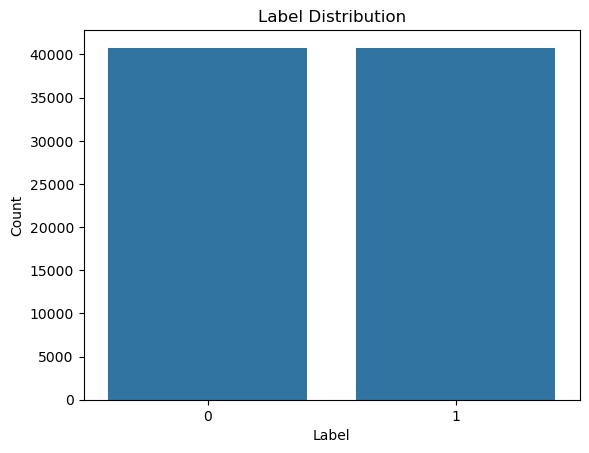

In [8]:
label_counts = data['label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

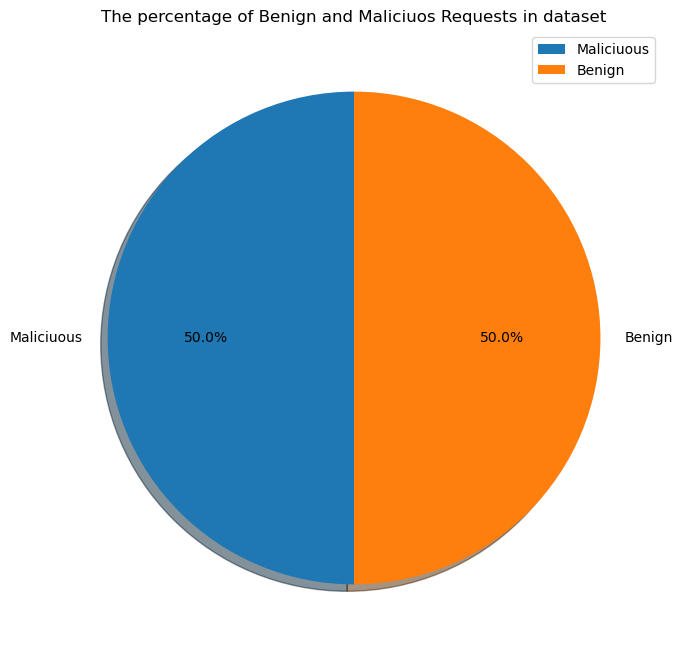

In [9]:
labels = ["Maliciuous",'Benign']
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Maliciuous", "Benign"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

In [10]:
df = data.copy()

In [11]:
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,32823,1,10.0.0.3,10.0.0.1,457,44786,468,470000000,4.680000e+11,6,...,0,1,ICMP,2,40983,37628,0,0.0,0.0,0
1,31843,3,10.0.0.15,10.0.0.1,196857,10630278,360,124000000,3.600000e+11,5,...,508,1,TCP,1,466233627,34059510,0,0.0,0.0,0
2,7057,6,10.0.0.7,10.0.0.14,42035,2438030,135,548000000,1.360000e+11,7,...,286,1,TCP,1,4777445,116457462,144,3506.0,3650.0,1
3,31483,6,10.0.0.12,10.0.0.1,66596,73234336,150,484000000,1.500000e+11,7,...,454,1,TCP,4,14695284,325158222,494,7993.0,8487.0,0
4,26807,2,10.0.0.7,10.0.0.2,18999,19796958,68,415000000,6.841500e+10,6,...,281,1,ICMP,2,4282,1172,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81563,11605,4,10.0.0.13,10.0.0.8,103008,107334336,330,872000000,3.310000e+11,5,...,308,0,UDP,4,3842,3520,0,0.0,0.0,1
81564,7032,9,10.0.0.18,10.0.0.9,352,34496,361,477000000,3.610000e+11,5,...,0,0,ICMP,2,5631,1702,0,0.0,0.0,0
81565,11365,3,10.0.0.2,10.0.0.8,63143,67310438,139,453000000,1.390000e+11,5,...,450,0,UDP,3,3623,3413,0,0.0,0.0,0
81566,11575,2,10.0.0.10,10.0.0.8,62011,64615462,200,698000000,2.010000e+11,3,...,311,0,UDP,4,3735,3483,0,0.0,0.0,1


In [12]:
class Model:
    global y
    
    def __init__(self, data):
        self.data = data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3) 
        
        self.accuracy_lr = 0
        self.accuracy_svm = 0
        self.accuracy_rf = 0
        self.accuracy_gbc = 0

    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            
            results_lr.append({'solver': solver, 'accuracy': f"{round(accuracy_lr * 100, 2)}%",
                               'Coefficients': {'W': LR.coef_, 'b': LR.intercept_}})
            
            accuracy_list.append(accuracy_lr)
       
        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train, self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print(f"Accuracy of LR model is: {round(accuracy_lr * 100, 2)}%", '\n')
        print("########################################################################")
        print('Best solver is:', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        self.accuracy_lr = accuracy_lr

        cm = confusion_matrix(self.y_test, predicted_lr)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - Logistic Regression ({solver_name})')
        plt.show()

    
    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly', 'rbf', 'sigmoid']

        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel": kernel, "accuracy": f"{round(accuracy_svm * 100, 2)}%"})
            print("Accuracy: %.2f%%" % round((accuracy_svm * 100.0), 2))
            print('######################################################################')
            accuracy_list.append(accuracy_svm)

        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        print(f"Accuracy of SVM model {round(accuracy_svm, 2) * 100}%", '\n')
        print("########################################################################")
        print('Best kernel is:', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        self.accuracy_svm = accuracy_svm 

        cm = confusion_matrix(self.y_test, predicted_svm)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - SVM ({kernel_name})')
        plt.show()

    def RandomForest(self):
        start_time = time.time()
    
        param_grid = {
    'n_estimators': [100, 200, 500],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 3, 4, 5, 6]  # Include 'None' for unlimited depth
}


        rf_base = RandomForestClassifier(criterion='gini', 
                                      oob_score=True,
                                      random_state=1,
                                      n_jobs=-1)

        rf_search = GridSearchCV(rf_base, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
        rf_search.fit(self.X_train, self.y_train)
    
        best_rf = rf_search.best_estimator_
        predicted_rf = best_rf.predict(self.X_test)
        accuracy_rf = accuracy_score(self.y_test, predicted_rf)

        print(f"Accuracy of RF model is: {round(accuracy_rf * 100, 2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))
        self.accuracy_rf = accuracy_rf

        cm = confusion_matrix(self.y_test, predicted_rf)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix - Random Forest')
        plt.show()

    def GradientBoost(self):
        start_time = time.time()
        gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
        gbc.fit(self.X_train, self.y_train)

        predicted_gbc = gbc.predict(self.X_test)
        accuracy_gbc = accuracy_score(self.y_test, predicted_gbc)
        print(f"Accuracy of Gradient Boosting model is: {round(accuracy_gbc * 100, 2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_gbc, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))
        self.accuracy_gbc = accuracy_gbc
        
        cm = confusion_matrix(self.y_test, predicted_gbc)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix - Gradient Boosting')
        plt.show()
        
    def plot_accuracy(self, accuracies, model_names):
        plt.figure(figsize=(10, 6))
        plt.bar(model_names, accuracies, color='blue')
        plt.xlabel('Model')
        plt.ylabel('Accuracy')
        plt.title('Accuracy of Different Models')
        plt.ylim(0, 100)  # Set y-axis limit to be between 0 and 100 (percentage)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def run_models(self):
        self.LogisticRegression()
        self.SupportVectorMachine()
        self.RandomForest()
        self.GradientBoost()

        model_names = ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Gradient Boosting']
        accuracies = [self.accuracy_lr * 100, self.accuracy_svm * 100, self.accuracy_rf * 100, self.accuracy_gbc * 100]

        self.plot_accuracy(accuracies, model_names)


In [13]:
df = data.copy()
df = df.dropna()

In [14]:

X = df.drop(['dt','src','dst','label','Protocol'], axis=1)
y = df.label

In [15]:
X.head()
X.shape

(81142, 18)

In [16]:
abs(X.corr())

,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
switch,1.000000,0.054495,0.175455,0.047557,0.070977,0.047665,0.034273,0.217702,0.013069,0.099857,0.013076,0.099052,0.009607,0.049607,0.054623,0.033106,0.033261,0.047311
pktcount,0.054495,1.000000,0.653254,0.112190,0.032644,0.112273,0.244150,0.236237,0.421162,0.239570,0.421158,0.053383,0.004043,0.039079,0.044262,0.024444,0.028761,0.037680
bytecount,0.175455,0.653254,1.000000,0.127342,0.019698,0.127337,0.223522,0.173345,0.259410,0.486501,0.259403,0.378976,0.012071,0.025972,0.027512,0.034553,0.038184,0.051647
dur,0.047557,0.112190,0.127342,1.000000,0.067142,0.999998,0.168261,0.123678,0.292620,0.226357,0.292908,0.183928,0.000447,0.153805,0.178224,0.140556,0.166401,0.217332
dur_nsec,0.070977,0.032644,0.019698,0.067142,1.000000,0.065783,0.020557,0.048579,0.051056,0.049105,0.051056,0.197495,0.017701,0.002551,0.001387,0.031615,0.040041,0.050593
tot_dur,0.047665,0.112273,0.127337,0.999998,0.065783,1.000000,0.168255,0.123730,0.292587,0.226350,0.292875,0.183725,0.000416,0.153845,0.178267,0.140633,0.166496,0.217455
flows,0.034273,0.244150,0.223522,0.168261,0.020557,0.168255,1.000000,0.037159,0.174696,0.211312,0.174839,0.409315,0.028931,0.157033,0.177960,0.164851,0.193296,0.253677
packetins,0.217702,0.236237,0.173345,0.123678,0.048579,0.123730,0.037159,1.000000,0.163187,0.136282,0.163248,0.278221,0.001455,0.103688,0.118188,0.027737,0.032798,0.042862
pktperflow,0.013069,0.421162,0.259410,0.292620,0.051056,0.292587,0.174696,0.163187,1.000000,0.792261,0.999999,0.131350,0.003222,0.045714,0.052086,0.092115,0.109006,0.142401
byteperflow,0.099857,0.239570,0.486501,0.226357,0.049105,0.226350,0.211312,0.136282,0.792261,1.000000,0.792267,0.377623,0.008746,0.048773,0.057355,0.094063,0.107386,0.142845


In [17]:
X = pd.get_dummies(X)

In [18]:
M = Model(X)

In [19]:
#M.LogisticRegression()

In [20]:
#M.SupportVectorMachine()

In [21]:
#M.RandomForest()

In [22]:
#M.GradientBoost()

Accuracy of LR model is: 74.13% 

########################################################################
Best solver is: lbfgs
########################################################################
              precision    recall  f1-score   support

           0       0.73      0.75      0.74     12034
           1       0.75      0.73      0.74     12309

    accuracy                           0.74     24343
   macro avg       0.74      0.74      0.74     24343
weighted avg       0.74      0.74      0.74     24343
 

########################################################################
--- 1.585399866104126 seconds --- time for LogisticRegression


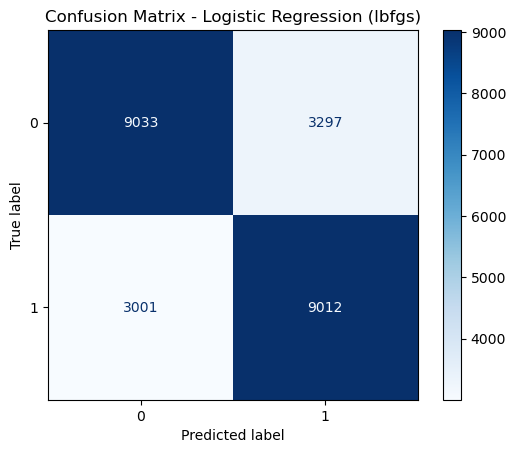

Accuracy: 74.58%
######################################################################
Accuracy: 95.76%
######################################################################
Accuracy: 96.75%
######################################################################
Accuracy: 55.47%
######################################################################
Accuracy of SVM model 97.0% 

########################################################################
Best kernel is: rbf
########################################################################
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11998
           1       0.98      0.95      0.97     12345

    accuracy                           0.97     24343
   macro avg       0.97      0.97      0.97     24343
weighted avg       0.97      0.97      0.97     24343

########################################################################
--- 422.19968605041504 seconds ---


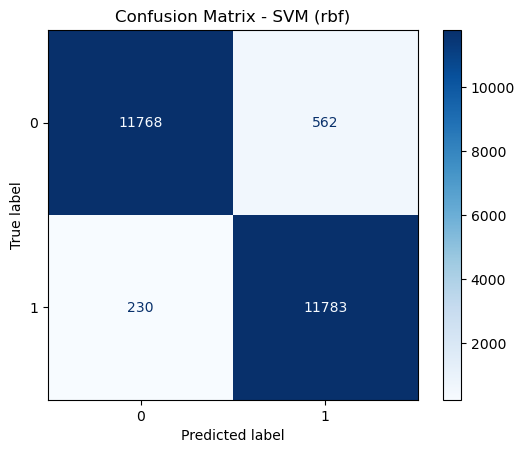

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Accuracy of RF model is: 99.99% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12327
           1       1.00      1.00      1.00     12016

    accuracy                           1.00     24343
   macro avg       1.00      1.00      1.00     24343
weighted avg       1.00      1.00      1.00     24343

########################################################################
--- 777.7631492614746 seconds ---


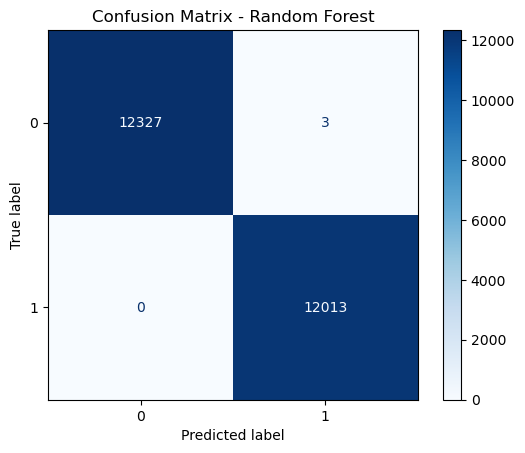

Accuracy of Gradient Boosting model is: 99.25% 

########################################################################
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12194
           1       1.00      0.99      0.99     12149

    accuracy                           0.99     24343
   macro avg       0.99      0.99      0.99     24343
weighted avg       0.99      0.99      0.99     24343

########################################################################
--- 12.739699363708496 seconds ---


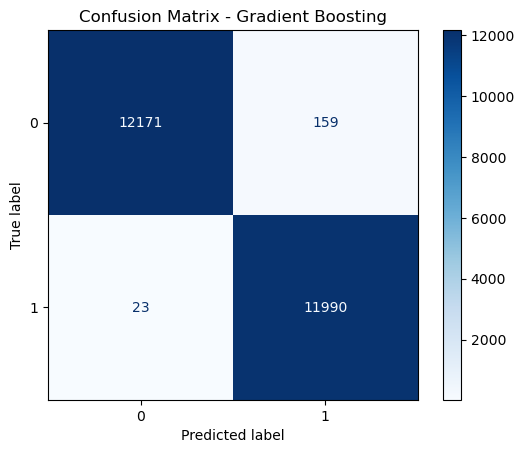

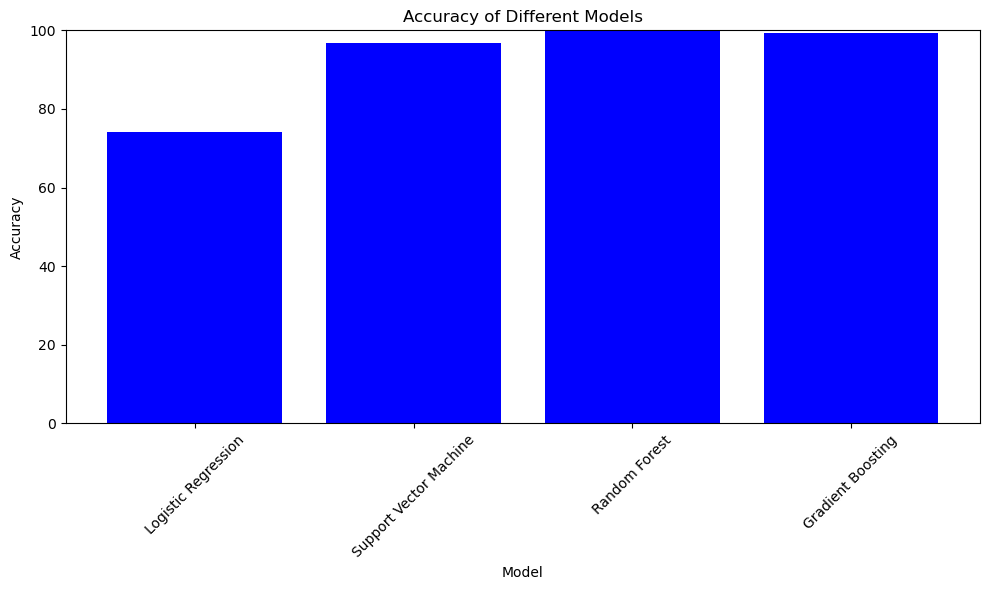

In [23]:
M.run_models()